# 딥 러닝을 이용한 자연어 처리 입문

[구글 코랩에서 실행하기](https://colab.research.google.com/drive/16vVC57za6GRjPaehuvYn_QjParopx8El?usp=sharing)

https://wikidocs.net/150781

딥 러닝의 학습 방법의 이해를 위해 필요한 개념인 손실 함수, 옵티마이저, 에포크의 개념에 대해서 정리합니다.

1. 손실 함수(Loss function)

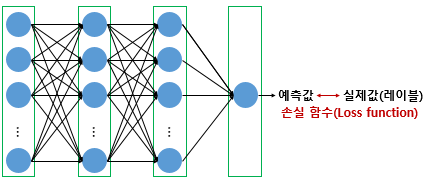

손실 함수는 실제값과 예측값의 차이를 수치화해주는 함수입니다. 이 두 값의 차이. 즉, 오차가 클 수록 손실 함수의 값은 크고 오차가 작을 수록 손실 함수의 값은 작아집니다. 회귀에서는 평균 제곱 오차, 분류 문제에서는 크로스 엔트로피를 주로 손실 함수로 사용합니다. 손실 함수의 값을 최소화하는 두 개의 매개변수인 가중치 w
와 편향 b
의 값을 찾는 것이 딥 러닝의 학습 과정이므로 손실 함수의 선정은 매우 중요합니다. 앞서 설명했던 손실 함수를 정리해봅시다.

1) MSE(Mean Squared Error, MSE)

평균 제곱 오차는 선형 회귀를 학습할 때 배웠던 손실 함수입니다. 연속형 변수를 예측할 때 사용됩니다.

다음과 같이 compile의 loss에 문자열 'mse'라고 기재하여 사용할 수 있습니다.

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
model = Sequential()

In [3]:

#4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation = 'relu'))

#이어서 8개의 출력
model.add(Dense(8, activation = 'relu'))

#이어서 3개의 출력
model.add(Dense(3, activation = 'softmax'))

In [4]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용할 수도 있습니다.

In [5]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError(), metrics = ['mse'])

딥 러닝 자연어 처리는 대부분 분류 문제이므로 평균 제곱 오차보다는 아래의 크로스 엔트로피 함수들을 주로 사용합니다.

2) 이진 크로스 엔트로피(Binary Cross-Entropy)

이항 교차 엔트로피라고도 부르는 손실 함수입니다. 출력층에서 시그모이드 함수를 사용하는 이진 분류 (Binary Classification)의 경우 binary_crossentropy를 사용합니다. compile의 loss에 문자열로 'binary_crossentropy'를 기재해주면 됩니다. 이는 로지스틱 회귀에서 사용했던 손실 함수입니다.

In [6]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용할 수도 있습니다.

In [7]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = 'adam', metrics = ['accuracy'])

3) 카테고리칼 크로스 엔트로피(Categorical Cross-Entropy)

범주형 교차 엔트로피라고도 부르는 손실 함수입니다. 출력층에서 소프트맥스 함수를 사용하는 다중 클래스 분류(Multi-Class Classification)일 경우 categorical_crossentropy를 사용합니다. compile의 loss에 문자열로 'categorical_crossentropy'를 기재해주면 됩니다. 소프트맥스 회귀에서 사용했던 손실 함수입니다.

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용할 수도 있습니다.

In [9]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

만약 레이블에 대해서 원-핫 인코딩 과정을 생략하고, 정수값을 가진 레이블에 대해서 다중 클래스 분류를 수행하고 싶다면 다음과 같이 'sparse_categorical_crossentropy'를 사용합니다.

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])


In [11]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

4) 그 외에 다양한 손실 함수들

아래의 텐서플로우 공식 문서 링크에서 방금 언급하지 않은 손실 함수 외에도 다양한 손실 함수들을 확인할 수 있습니다.

https://www.tensorflow.org/api_docs/python/tf/keras/losses

지금까지 자주 사용하는 손실 함수 몇 가지에 대해서 정리해봤습니다. 위 compile 코드에서 optimizer='adam' 이라는 부분에 주목해봅시다. 이는 아담이라는 옵티마이저를 사용했다라는 의미입니다. 손실 함수의 선정만큼이나 옵티마이저의 선정 또한 중요합니다. 이어서 옵티마이저에 대해서 정리해봅시다.

2. 배치 크기(Batch Size)에 따른 경사 하강법

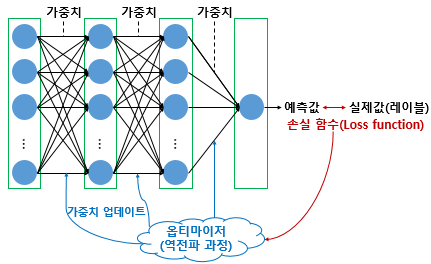

손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라집니다. 여기서 배치(Batch)라는 개념에 대한 이해가 필요합니다. 배치는 가중치 등의 매개 변수의 값을 조정하기 위해 사용하는 데이터의 양을 말합니다. 전체 데이터를 가지고 매개 변수의 값을 조정할 수도 있고, 정해준 양의 데이터만 가지고도 매개 변수의 값을 조정할 수 있습니다.

1) 배치 경사 하강법(Batch Gradient Descent)

배치 경사 하강법(Batch Gradient Descent)은 가장 기본적인 경사 하강법입니다. 배치 경사 하강법은 옵티마이저 중 하나로 오차(loss)를 구할 때 전체 데이터를 고려합니다. 딥 러닝에서는 전체 데이터에 대한 한 번의 훈련 횟수를 1 에포크라고 하는데, 배치 경사 하강법은 한 번의 에포크에 모든 매개변수 업데이트를 단 한 번 수행합니다. 배치 경사 하강법은 전체 데이터를 고려해서 학습하므로 한 번의 매개 변수 업데이트에 시간이 오래 걸리며, 메모리를 크게 요구한다는 단점이 있습니다.

In [ ]:
model.fit(X_train, y_train, batch_size = len(X_train))

2) 배치 크기가 1인 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

기존의 배치 경사 하강법은 전체 데이터에 대해서 계산을 하다보니 시간이 너무 오래걸린다는 단점이 있습니다. 배치 크기가 1인 확률적 경사 하강법은 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법입니다. 더 적은 데이터를 사용하므로 더 빠르게 계산할 수 있습니다.

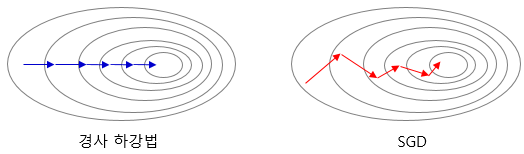

위 그림에서 좌측은 배치 경사 하강법, 우측은 배치 크기가 1인 확률적 경사 하강법이 최적해를 찾아가는 모습을 보여주고 있습니다. 확률적 경사 하강법은 매개변수의 변경폭이 불안정하고, 때로는 배치 경사 하강법보다 정확도가 낮을 수도 있지만 하나의 데이터에 대해서만 메모리에 저장하면 되므로 자원이 적은 컴퓨터에서도 쉽게 사용가능 하다는 장점이 있습니다. 케라스에서는 아래와 같이 사용합니다.

In [ ]:
model.fit(X_train, y_train, batch_size = 1)

3) 미니 배치 경사 하강법(Mini-Batch Gradient Descent)

전체 데이터도, 1개의 데이터도 아닐 때, 배치 크기를 지정하여 해당 데이터 개수만큼에 대해서 계산하여 매개 변수의 값을 조정하는 경사 하강법을 미니 배치 경사 하강법이라고 합니다. 미니 배치 경사 하강법은 전체 데이터를 계산하는 것보다 빠르며, SGD보다 안정적이라는 장점이 있습니다. 가장 많이 사용되는 경사 하강법으로 앞으로 이 책에서도 주로 배치 크기를 지정하여 미니 배치 경사 하강법으로 학습하게 될 것입니다. 아래의 코드는 배치 크기를 128로 지정했을 경우를 보여줍니다.

In [ ]:
model.fit(X_train, y_train, batch_size = 128)

배치 크기는 일반적으로 2의 n제곱에 해당하는 숫자로 선택하는 것이 보편적입니다. 만약, model.fit()에서 배치 크기를 별도로 지정해주지 않을 경우에 기본값은 2의 5제곱에 해당하는 숫자인 32로 설정됩니다. 지금까지 배치 크기에 따른 학습 방법의 차이를 알아봤습니다. 앞으로는 경사 하강법의 알고리즘 자체를 조금씩 달리한 다양한 옵티마이저에 대해서 설명합니다.

3. 옵티마이저(Optimizer)

1) 모멘텀(Momentum)

모멘텀(Momentum)은 관성이라는 물리학의 법칙을 응용한 방법입니다. 모멘텀 경사 하강법에 관성을 더 해줍니다. 모멘텀은 경사 하강법에서 계산된 접선의 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영합니다. 이렇게 하면 마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있습니다.



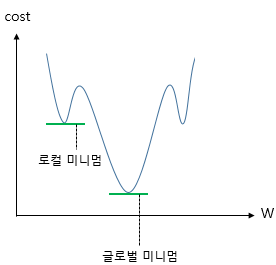

전체 함수에 걸쳐 최소값을 글로벌 미니멈(Global Minimum) 이라고 하고, 글로벌 미니멈이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum) 이라고 합니다. 로컬 미니멈에 도달하였을 때 글로벌 미니멈으로 잘못 인식하여 탈출하지 못하였을 상황에서 모멘텀. 즉, 관성의 힘을 빌리면 값이 조절되면서 현재의 로컬 미니멈에서 탈출하고 글로벌 미니멈 내지는 더 낮은 로컬 미니멈으로 갈 수 있는 효과를 얻을 수도 있습니다.

In [ ]:
tf.keras.optimizers.SGD(lr=0.01, momentum = 0.9)

2) 아다그라드(Adagrad)

매개변수들은 각자 의미하는 바가 다른데, 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적입니다. 아다그라드는 각 매개변수에 서로 다른 학습률을 적용시킵니다. 이때 변화가 많은 매개변수는 학습률이 작게 설정되고 변화가 적은 매개변수는 학습률을 높게 설정시킵니다.

In [14]:
tf.keras.optimizers.Adagrad(learning_rate=0.01, epsilon = 1e-6)

3) 알엠에스프롭(RMSprop)

아다그라드는 학습을 계속 진행한 경우에는, 나중에 가서는 학습률이 지나치게 떨어진다는 단점이 있는데 이를 다른 수식으로 대체하여 이러한 단점을 개선하였습니다.

In [15]:
tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-06)

4) 아담(Adam)

아담은 알엠에스프롭과 모멘텀 두 가지를 합친 듯한 방법으로, 방향과 학습률 두 가지를 모두 잡기 위한 방법입니다.

In [ ]:
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

5) 사용 방법

각 옵티마이저 인스턴스는 compile의 optimizer에서 호출합니다. 예를 들어 아담(adam)은 다음과 같이 코드를 작성합니다.


In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

링크 : https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

4. 역전파(BackPropagation)

이 부분은 05) 역전파 챕터로 별도 작성되었습니다.

5. 에포크와 배치 크기와 이터레이션(Epochs and Batch size and Iteration)

기계는 실제값과 예측값의 오차로부터 옵티마이저를 통해서 가중치를 업데이트합니다. 머신 러닝에서는 이 과정을 학습이라고 합니다. 이를 현실의 학습에 비유하면 사람은 문제지의 문제를 풀고, 정답지의 정답을 보면서 채점을 하면서 부족했던 점을 깨달으며 머릿속의 지식이 업데이트되는 과정입니다.

그런데 사람마다 동일한 문제지와 정답지를 주더라도 공부 방법은 사실 천차만별입니다. 어떤 사람은 문제지 하나를 다 풀고 나서 정답을 채점하는데 어떤 사람은 문제지의 문제를 10개 단위로 끊어서 공부합니다. 문제 10개를 풀고 채점하고 다시 다음 문제 10개를 풀고 채점하고 반복하는 방식으로 학습하는 방식입니다. 또한 게으른 사람은 문제지를 세 번 공부하는데, 성실한 사람은 문제지의 문제를 달달 외울만큼 문제지를 100번 공부합니다. 기계도 똑같습니다. 같은 문제지와 정답지를 주더라도 공부 방법을 다르게 설정할 수 있습니다.

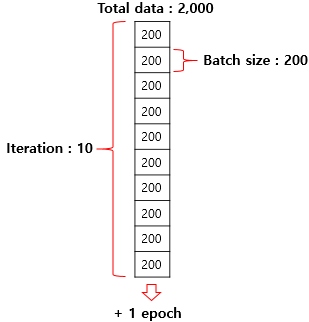

위 그림은 에포크와 배치 크기와 이터레이션의 차이를 보여줍니다.

1) 에포크(Epoch)

에포크란 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태를 말합니다. 전체 데이터를 하나의 문제지에 비유한다면 문제지의 모든 문제를 끝까지 다 풀고, 정답지로 채점을 하여 문제지에 대한 공부를 한 번 끝낸 상태를 말합니다.

만약 에포크가 50이라고 하면, 전체 데이터 단위로는 총 50번 학습합니다. 문제지에 비유하면 문제지를 50번 푼 셈입니다. 이 에포크 횟수가 지나치거나 너무 적으면 앞서 배운 과적합과 과소적합이 발생할 수 있습니다.

2) 배치 크기(Batch size)

배치 크기는 몇 개의 데이터 단위로 매개변수를 업데이트 하는지를 말합니다. 현실에 비유하면 문제지에서 몇 개씩 문제를 풀고나서 정답지를 확인하느냐의 문제입니다. 사람은 문제를 풀고 정답을 보는 순간 부족했던 점을 깨달으며 지식이 업데이트 된다고 하였습니다. 기계 입장에서는 실제값과 예측값으로부터 오차를 계산하고 옵티마이저가 매개변수를 업데이트합니다. 여기서 중요한 포인트는 업데이트가 시작되는 시점이 정답지/실제값을 확인하는 시점이라는 겁니다.

사람이 2,000 문제가 수록되어있는 문제지의 문제를 200개 단위로 풀고 채점한다고 하면 이때 배치 크기는 200입니다. 기계는 배치 크기가 200이면 200개의 샘플 단위로 가중치를 업데이트 합니다.

여기서 주의할 점은 배치 크기와 배치의 수는 다른 개념이라는 점입니다. 전체 데이터가 2,000일때 배치 크기를 200으로 준다면 배치의 수는 10입니다. 이는 에포크에서 배치 크기를 나눠준 값(2,000/200 = 10)이기도 합니다. 이때 배치의 수를 이터레이션이라고 합니다.

3) 이터레이션(Iteration) 또는 스텝(Step)

이터레이션이란 한 번의 에포크를 끝내기 위해서 필요한 배치의 수를 말합니다. 또는 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수이기도 합니다. 전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10입니다. 이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어진다는 것을 의미합니다. 배치 크기가 1인 확률적 경사 하강법을 이 개념을 가지고 다시 설명하면 배치 크기가 1이므로 모든 이터레이션마다 하나의 데이터를 선택하여 경사 하강법을 수행합니다. 이터레이션은 스텝(Step)이라고 부르기도 하므로 두 용어 모두 기억해둡시다.